<a href="https://colab.research.google.com/github/brialln/Air-Data-Quality-Analysis-Using-R/blob/main/Air_Quality_Analysis_Probability_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this in a Python cell to set up R in Google Colab
!pip install rpy2==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314950 sha256=4cadd5129b1dabae19dec679152ce059b5a50a5fb8dc8f21171aee1d7b26ada9
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


In [ ]:
# Load the R magic
%load_ext rpy2.ipython

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




Rows: 216 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Combined Wind Direction
dbl  (7): PM2.5 Concentration, Dew Point, Temperature, Pressure, Combined Wi...
dttm (1): DateTime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Mean PM2.5 Concentration: 82.88426 
Standard Deviation: 58.09856 
png 
  2 


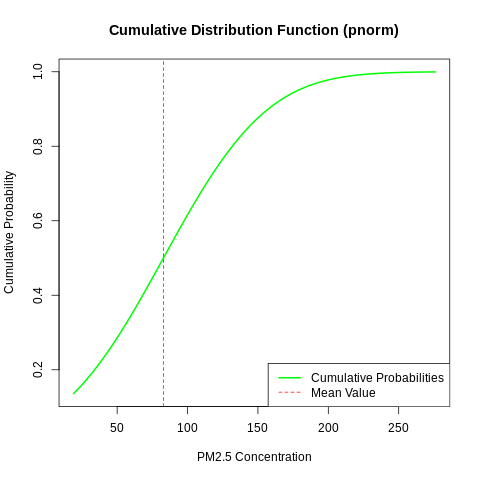

In [ ]:
%%R
# Load libraries
library(readr)
library(dplyr)

# Load the dataset
data <- read_csv("/content/R Language_ Project 3 - Air Quality Data - Air Quality in US embassy in Beijing, China.csv")

# Extract the PM2.5 Concentration column
pm25_concentration <- data$`PM2.5 Concentration`  # Use backticks for column names with spaces

# Calculate mean and standard deviation
mean_val <- mean(pm25_concentration, na.rm = TRUE)
sd_val <- sd(pm25_concentration, na.rm = TRUE)

# Display results
cat("Mean PM2.5 Concentration:", mean_val, "\n")
cat("Standard Deviation:", sd_val, "\n")

# Generate a sequence of magnitude values
x_vals <- seq(min(pm25_concentration, na.rm = TRUE) - 1, max(pm25_concentration, na.rm = TRUE) + 1, length.out = 100)

# Compute cumulative probabilities
cumulative_probs <- pnorm(x_vals, mean = mean_val, sd = sd_val)

# Plot in the console
plot(x_vals, cumulative_probs, type = "l", col = "green", lwd = 2,
     main = "Cumulative Distribution Function (pnorm)",
     xlab = "PM2.5 Concentration", ylab = "Cumulative Probability")
abline(v = mean_val, col = "red", lty = 2)
legend("bottomright", legend = c("Cumulative Probabilities", "Mean Value"),
       col = c("green", "red"), lty = c(1, 2), lwd = c(2, 1))

# Save the plot as a PNG file
png("cumulative_distribution_plot.png", width = 800, height = 600)
plot(x_vals, cumulative_probs, type = "l", col = "green", lwd = 2,
     main = "Cumulative Distribution Function (pnorm)",
     xlab = "PM2.5 Concentration", ylab = "Cumulative Probability")
abline(v = mean_val, col = "red", lty = 2)
legend("bottomright", legend = c("Cumulative Probabilities", "Mean Value"),
       col = c("green", "red"), lty = c(1, 2), lwd = c(2, 1))
dev.off()


Rows: 216 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Combined Wind Direction
dbl  (7): PM2.5 Concentration, Dew Point, Temperature, Pressure, Combined Wi...
dttm (1): DateTime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Mean PM2.5 Concentration: 82.88426 
Standard Deviation: 58.09856 
png 
  2 


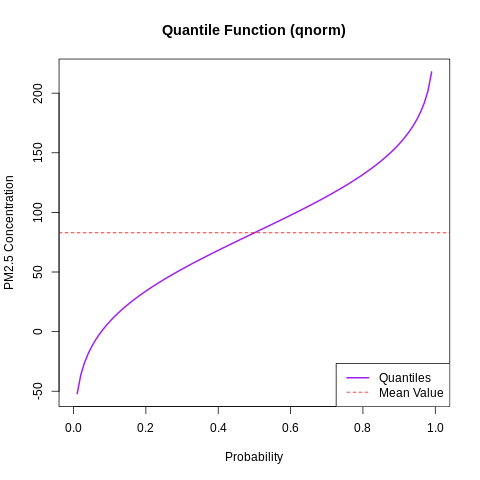

In [ ]:
%%R
# Load libraries
library(readr)
library(dplyr)

# Load the dataset
data <- read_csv("/content/R Language_ Project 3 - Air Quality Data - Air Quality in US embassy in Beijing, China.csv")

# Extract the PM2.5 Concentration column
pm25_concentration <- data$`PM2.5 Concentration`

# Calculate mean and standard deviation
mean_val <- mean(pm25_concentration, na.rm = TRUE)
sd_val <- sd(pm25_concentration, na.rm = TRUE)

# Display results
cat("Mean PM2.5 Concentration:", mean_val, "\n")
cat("Standard Deviation:", sd_val, "\n")

# Define probabilities
prob_vals <- seq(0, 1, length.out = 100)

# Compute quantiles
quantiles <- qnorm(prob_vals, mean = mean_val, sd = sd_val)

# Plot in the console
plot(prob_vals, quantiles, type = "l", col = "purple", lwd = 2,
     main = "Quantile Function (qnorm)",
     xlab = "Probability", ylab = "PM2.5 Concentration")
abline(h = mean_val, col = "red", lty = 2)
legend("bottomright", legend = c("Quantiles", "Mean Value"),
       col = c("purple", "red"), lty = c(1, 2), lwd = c(2, 1))

# Save the plot as a PNG file
png("quantile_function_plot.png", width = 800, height = 600)
plot(prob_vals, quantiles, type = "l", col = "purple", lwd = 2,
     main = "Quantile Function (qnorm)",
     xlab = "Probability", ylab = "PM2.5 Concentration")
abline(h = mean_val, col = "red", lty = 2)
legend("bottomright", legend = c("Quantiles", "Mean Value"),
       col = c("purple", "red"), lty = c(1, 2), lwd = c(2, 1))
dev.off()

Rows: 216 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Combined Wind Direction
dbl  (7): PM2.5 Concentration, Dew Point, Temperature, Pressure, Combined Wi...
dttm (1): DateTime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Mean PM2.5 Concentration: 82.88426 
Standard Deviation: 58.09856 
png 
  2 


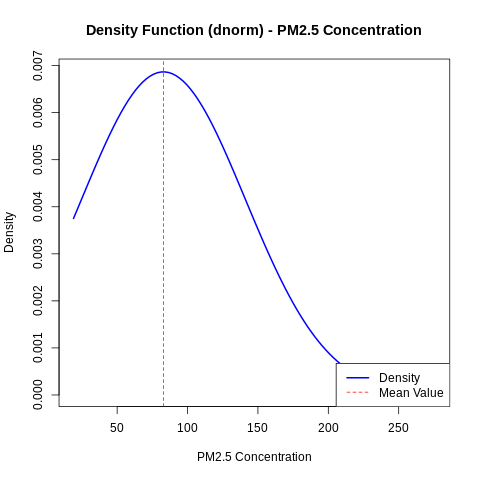

In [ ]:
%%R
# Load libraries
library(readr)
library(dplyr)

# Load the dataset
data <- read_csv("/content/R Language_ Project 3 - Air Quality Data - Air Quality in US embassy in Beijing, China.csv")

# Extract the PM2.5 Concentration column
pm25_concentration <- data$`PM2.5 Concentration`

# Calculate mean and standard deviation
mean_val <- mean(pm25_concentration, na.rm = TRUE)
sd_val <- sd(pm25_concentration, na.rm = TRUE)

# Display results
cat("Mean PM2.5 Concentration:", mean_val, "\n")
cat("Standard Deviation:", sd_val, "\n")

# Generate a sequence of PM2.5 Concentration values
x_vals <- seq(min(pm25_concentration, na.rm = TRUE) - 1,
              max(pm25_concentration, na.rm = TRUE) + 1,
              length.out = 100)

# Compute density using dnorm
densities <- dnorm(x_vals, mean = mean_val, sd = sd_val)

# Plot in the console
plot(x_vals, densities, type = "l", col = "blue", lwd = 2,
     main = "Density Function (dnorm) - PM2.5 Concentration",
     xlab = "PM2.5 Concentration", ylab = "Density")
abline(v = mean_val, col = "red", lty = 2)
legend("bottomright", legend = c("Density", "Mean Value"),
       col = c("blue", "red"), lty = c(1, 2), lwd = c(2, 1))

# Save the plot as a PNG file
png("density_function_plot.png", width = 800, height = 600)
plot(x_vals, densities, type = "l", col = "blue", lwd = 2,
     main = "Density Function (dnorm) - PM2.5 Concentration",
     xlab = "PM2.5 Concentration", ylab = "Density")
abline(v = mean_val, col = "red", lty = 2)
legend("topright", legend = c("Density", "Mean Value"),
       col = c("blue", "red"), lty = c(1, 2), lwd = c(2, 1))
dev.off()

'data.frame':	216 obs. of  9 variables:
 $ DateTime               : chr  "2010-01-02T00:00:00Z" "2010-01-02T01:00:00Z" "2010-01-02T02:00:00Z" "2010-01-02T03:00:00Z" ...
 $ PM2.5.Concentration    : int  129 148 159 181 138 109 105 124 120 132 ...
 $ Dew.Point              : int  -16 -15 -11 -7 -7 -7 -7 -7 -8 -7 ...
 $ Temperature            : int  -4 -4 -5 -5 -5 -6 -6 -5 -6 -5 ...
 $ Pressure               : int  1020 1020 1021 1022 1022 1022 1023 1024 1024 1025 ...
 $ Combined.Wind.Direction: chr  "SE" "SE" "SE" "SE" ...
 $ Combined.Wind.Speed    : num  1.79 2.68 3.57 5.36 6.25 ...
 $ Cumulated.Hours.of.Snow: int  0 0 0 1 2 3 4 0 0 0 ...
 $ Cumulated.Hours.of.Rain: int  0 0 0 0 0 0 0 0 0 0 ...
Mean PM2.5 Concentration: 82.88426 
Standard Deviation: 58.09856 
png 
  2 


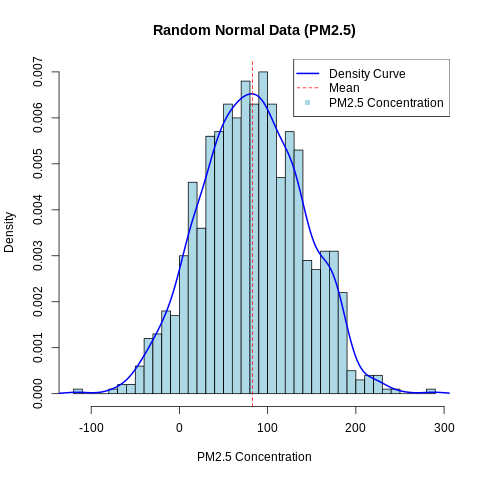

In [ ]:
%%R
# Load the libraries
library(ggplot2)

# Load the dataset (update the file path as needed)
data <- read.csv("/content/R Language_ Project 3 - Air Quality Data - Air Quality in US embassy in Beijing, China.csv")

# Check the structure of the dataset
str(data)

# Extract the PM2.5 Concentration column
pm25 <- data$PM2.5.Concentration

# Calculate mean and standard deviation
mean_val <- mean(pm25, na.rm = TRUE)
sd_val <- sd(pm25, na.rm = TRUE)

# Display the results
cat("Mean PM2.5 Concentration:", mean_val, "\n")
cat("Standard Deviation:", sd_val, "\n")

# Generate random PM2.5 concentrations based on the calculated mean and SD
random_pm25 <- rnorm(1000, mean = mean_val, sd = sd_val)

# Plot histogram in the console
hist(random_pm25, breaks = 30, col = "lightblue", border = "black",
     main = "Random Normal Data (PM2.5)",
     xlab = "PM2.5 Concentration", probability = TRUE)
lines(density(random_pm25), col = "blue", lwd = 2)
abline(v = mean_val, col = "red", lty = 2)
legend("topright", legend = c("Density Curve", "Mean", "PM2.5 Concentration"),
       col = c("blue", "red", "lightblue"), lty = c(1, 2, NA), lwd = c(2, 1, NA),
       pch = c(NA, NA, 15), pt.bg = c(NA, NA, "lightblue"))

# Save the histogram as a PNG file
png("random_pm25_histogram_with_legend.png", width = 800, height = 600)
hist(random_pm25, breaks = 30, col = "lightblue", border = "black",
     main = "Random Normal Data (PM2.5)",
     xlab = "PM2.5 Concentration", probability = TRUE)
lines(density(random_pm25), col = "blue", lwd = 2)
abline(v = mean_val, col = "red", lty = 2)
legend("topright", legend = c("Density Curve", "Mean", "PM2.5 Concentration"),
       col = c("blue", "red", "lightblue"), lty = c(1, 2, NA), lwd = c(2, 1, NA),
       pch = c(NA, NA, 15), pt.bg = c(NA, NA, "lightblue"))
dev.off()
